In [5]:
import pandas as pd
import numpy as np
import math
import pickle
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import re

### Auxiliary functions

In [6]:
def format_equation(str_equ, exp = 'x', var = 'x'):
    strOut = re.sub(r"{}".format(var), "({})".format(var), str_equ)
    strOut = re.sub(r"(?<=[A-Za-z0-9\)])(\({}\))".format(var), "*({})".format(var), strOut)
    strOut = re.sub(r"(?<=[0-9])\(", "*(", strOut)
    strOut = re.sub(r"(\^\({}\))".format(var), "**({})".format(var), strOut)
    strOut = re.sub(r"(\({}\))".format(var), "({})".format(exp), strOut)
    strOut = re.sub(r"\^", "**", strOut)
    
    strOut = re.sub(r"e", "math.e", strOut)
    strOut = re.sub(r"pi", "math.pi", strOut)
    strOut = re.sub(r"sin", "math.sin", strOut)
    strOut = re.sub(r"cos", "math.cos", strOut)
    strOut = re.sub(r"tan", "math.tan", strOut)
    strOut = re.sub(r"(?<=[A-Za-z0-9\)])(math.)", "*math.", strOut)
    return strOut

In [7]:
def format_secondVar(str_equ, var):
    strOut = re.sub(r"(?<=[A-Za-z0-9\)])({})".format(var), "*({})".format(var), str_equ)
    return strOut

In [8]:
#format_equation("2x^5+ 3x + x^2 + e^x + 3xy + 3sin(y) - 4cos(x) + 100(x + y)", 'x + h', 'y')
#format_equation("1/2x^TQx + c^Tx", 'x + h', 'x')

In [9]:
#format_secondVar("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + y^4", 'x')

In [10]:
def evaluate_Fx(str_equ, x):
    x = float(x)
    strOut = format_equation(str_equ, 'x')
    result = eval(strOut)
    return result

In [11]:
def finite_derivative(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = f3 = '(' +  str_equ + ')'
    
    f1 = format_equation(f1, 'x + 2*h')
    f2 = format_equation(f2, 'x + h')
    f3 = format_equation(f3, 'x')
      
    strOut = '(' + f1 + ' - 4 * ' + f2 + ' + 3 *' + f3 + ')' + ' / (2 * h)'
    result = eval(strOut)
    return result

## Lab1 Functions (derivatives)

#### R1 functions

In [12]:
def center_finite_derivative(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = '(' +  str_equ + ')'
    
    f1 = format_equation(f1, 'x + h')
    f2 = format_equation(f2, 'x - h')
      
    strOut = '(' + f1 + ' - ' + f2 + ')' + ' / (2 * h)'
    result = eval(strOut)
    return np.array(result, dtype = np.float32)

In [13]:
def progressive_finite_derivative(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = f3 = '(' +  str_equ + ')'
   
    f1 = format_equation(f1, 'x')
    f2 = format_equation(f2, 'x + h')
    f3 = format_equation(f3, 'x + 2*h')
      
    strOut = '( -3 * ' + f1 + ' + 4 * ' + f2 + ' - ' + f3 + ')' + ' / (2 * h)'
    result = eval(strOut)
    return np.array(result, dtype = np.float32)

In [14]:
def center_finite_derivative_2(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = f3 = f4 = '(' +  str_equ + ')'
    
    f1 = format_equation(f1, 'x + h')
    f2 = format_equation(f2, 'x - h')   
    f3 = format_equation(f3, 'x + 2*h')   
    f4 = format_equation(f4, 'x - 2*h')   
      
    strOut = '(' + f4 + ' - 8 * ' + f2 + ' + 8 * ' + f1 + ' - ' + f3 + ')' + ' / (12 * h)'
    result = eval(strOut)
    return np.array(result, dtype = np.float32)

In [15]:
#center_finite_derivative("2x^5 - 3", 1, 2)

In [16]:
#progressive_finite_derivative("2x^5 - 3", 1, 2)

In [17]:
#center_finite_derivative_2("2x^5 - 3", 1, 2)

#### R2 Functions

In [18]:
def center_finite_derivative_r2(str_equ, p, h):
    x = float(p[0])
    y = float(p[1])
    h = float(h)
    
    str_parciales = []
    for var in ['x', 'y']:
        #equ = str_equ.replace('y', '*(y)') if var == 'x' else str_equ.replace('x', '*(x)')
        equ = format_secondVar(str_equ, 'y') if var == 'x' else format_secondVar(str_equ, 'x')
        f1 = f2 = '(' +  equ + ')'
 
        f1 = format_equation(f1, var + ' + h', var)   
        f2 = format_equation(f2, var + ' - h', var)   
      
        strOut = '(' + f1 + ' - ' + f2 + ')' + ' / (2 * h)'
        str_parciales.append(strOut)
    
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, {'x': x, 'y': y, 'h': h}) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [19]:
def progressive_finite_derivative_r2(str_equ, p, h):
    x = float(p[0])
    y = float(p[1])
    h = float(h)
     
    str_parciales = []
    for var in ['x', 'y']:
        equ = format_secondVar(str_equ, 'y') if var == 'x' else format_secondVar(str_equ, 'x')
        f1 = f2 = f3 = '(' +  equ + ')'
   
        f1 = format_equation(f1, var, var)   
        f2 = format_equation(f2, var + '+ h', var)   
        f3 = format_equation(f3, var + ' + 2*h', var)   
        
        strOut = '(-3 * ' + f1 + ' + 4 * ' + f2 + ' - ' + f3 + ')' + ' / (2 * h)'
        str_parciales.append(strOut)
        
        
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, {'x': x, 'y': y, 'h': h}) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [20]:
def center_finite_derivative_2_r2(str_equ, p, h):
    x = float(p[0])
    y = float(p[1])
    h = float(h)
     
    str_parciales = []
    for var in ['x', 'y']:
        equ = format_secondVar(str_equ, 'y') if var == 'x' else format_secondVar(str_equ, 'x')
        f1 = f2 = f3 = f4 = '(' +  equ + ')'
    
        f1 = format_equation(f1, var + ' + h', var)   
        f2 = format_equation(f2, var + ' - h', var)   
        f3 = format_equation(f3, var + ' + 2*h', var)   
        f4 = format_equation(f4, var + ' - 2*h', var)   
        
        strOut = '(' + f4 + ' - 8 * ' + f2 + ' + 8 * ' + f1 + ' - ' + f3 + ')' + ' / (12 * h)'
        str_parciales.append(strOut)     
    
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, {'x': x, 'y': y, 'h': h}) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [21]:
#format_secondVar("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", 'x')

In [22]:
#center_finite_derivative_r2("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", ['2', '4'], 0.001)
#progressive_finite_derivative_r2("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", ['2', '4'], 0.001)
#center_finite_derivative_2_r2("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", ['2', '3'], 0.001)

### Any R Space Derivative Function

In [23]:
def center_finite_derivative_2_full(str_equ, p, h):
    x = np.array(p, dtype = np.float32)
    all_vars = ['x_{}'.format(i) for i in range(0, len(x))]
    vars_dict = {var: x_val for (var, x_val) in zip(all_vars, x)}
    vars_dict['h'] = h
    
    str_parciales = []
    equ = str_equ
    for i in range(0, len(x)):
        var = 'x_{}'.format(i)
        for incognita in all_vars:
            if incognita != var:
                equ = format_secondVar(equ, incognita)
        f1 = f2 = f3 = f4 = '(' +  equ + ')'
    
        f1 = format_equation(f1, var + ' + h', var)   
        f2 = format_equation(f2, var + ' - h', var)   
        f3 = format_equation(f3, var + ' + 2*h', var)   
        f4 = format_equation(f4, var + ' - 2*h', var)   
        
        strOut = '(' + f4 + ' - 8 * ' + f2 + ' + 8 * ' + f1 + ' - ' + f3 + ')' + ' / (12 * h)'
        str_parciales.append(strOut)     
    
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, vars_dict) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [24]:
#center_finite_derivative_2_full("3x_0^4 - 2x_1^3 - 4x_2^2x_1 + x_0", ['1', '2', '3'], 0.001)

## Lab2 Functions (ceros)

In [25]:
def metodo_biseccion(str_equ, interval, k_max, epsilon):
    k = 0
    a = float(interval[0])
    b = float(interval[1])
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Error': []}
    
    x_k = (a + b) / 2    
    while k < k_max and error > epsilon:
        Fa = evaluate_Fx(str_equ, a)
        Fx_k = evaluate_Fx(str_equ, x_k)
        if (Fa * Fx_k) < 0:
            b = x_k
        else:
            a = x_k
        
        k += 1
        x_k = (a + b) / 2
        error = abs(Fx_k)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k)
        data['Error'].append(error)
        
    results = pd.DataFrame(data)
    return results

In [26]:
def metodo_newton(str_equ, x_0, k_max, epsilon):
    k = 0
    x_k = x_0
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Error': []}
    
    while k < k_max and error > epsilon:
        Fx_k = evaluate_Fx(str_equ, x_k)
        dev1_Fx_k = center_finite_derivative_2(str_equ, x_k, 0.00001)
        
        x_k1 = x_k - (Fx_k / dev1_Fx_k)
        x_k = x_k1
        k += 1
        error = abs(Fx_k)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k)
        data['Error'].append(error)
        
    results = pd.DataFrame(data)
    return results

In [27]:
#equ = "3x^2 + 4x - 3"
#equ = "e^x + x^2"

#df = metodo_biseccion(equ, ['-4', '4'], 50, 0.001)
#df = metodo_newton(equ, 0.1, 50, 0.0001)
#df.tail()

## Lab3 Functions (GD)

In [28]:
def parseInput(x, reshape = False):
    if reshape:
        rows = len(x)
        x = np.array(x, dtype = 'float').reshape(rows, 1)
    else:
        x = np.array(x, dtype = 'float')

    return x

In [29]:
def getLearningRate(opt, k, gradient = None, Q = None, alpha = 0.001):
    if opt == 'Exacto':
        lr = (np.linalg.norm(gradient, 2)**2) / np.matmul(np.matmul(gradient.T, Q), gradient)
        lr = lr[0, 0]
    elif opt == 'Constante':
        lr = alpha
    elif opt == 'Variable':
        lr = 1/k
    else:
        lr = 1
        
    return lr

In [30]:
def gradient_descent_QP(x_0, Q, c, kmax, epsilon, lr_type, alpha = 0.001):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    c = parseInput(c, reshape = True)
    Q = parseInput(Q)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}
      
    while k < kmax and error > epsilon:
        gradient = np.matmul(Q, x_k) + c
        lr = getLearningRate(lr_type, k + 1, gradient, Q, alpha)
        x_k1 = x_k - (lr * gradient)
        
        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k)
        data['Pk'].append(-1 * gradient)
        data['Error'].append(error)     
  
    results = pd.DataFrame(data)
    return results

In [31]:
#First and second try
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([1, 0 ,1]).reshape(3, 1)
#x_0 = np.array([3, 5, 7]).reshape(3, 1)
x_0 = np.array([-1, 2, -3])
epsilon = 0.000001
lr_type = ['Exacto', 'Constante', 'Variable']
N = 30

In [32]:
#data = gradient_descent_QP(x_0, Q, c, N, epsilon, lr_type[0], alpha = 0.001)
#data.tail()

In [33]:
def getRosenbrockGradient(x0):
    x = x0[0, 0]
    y = x0[1, 0]
    g1 = eval('400*(x**3) + 2*(x) - 400*(x)*(y) - 2', {}, {'x': x, 'y': y})
    g2 = eval('-200*(x**2) + 200*(y)', {}, {'x': x, 'y': y})
    gradient = np.array([g1, g2], dtype = 'float').reshape(2,1)
    
    return gradient

In [34]:
def rosenbrock_gd(x_0, kmax, epsilon, lr):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}
      
    while k < kmax and error > epsilon:
        gradient = getRosenbrockGradient(x_k)
        x_k1 = x_k - (lr * gradient)

        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(-1 * gradient.round(7))
        data['Error'].append(error.round(7))  
    
    results = pd.DataFrame(data)
    return results

In [35]:
#getRosenbrockGradient(np.array([30., 30.]).reshape(2,1))

In [36]:
#x_0 = np.array(['0', '0'])
#alpha = 0.05
#epsilon = 0.00000001
#N = 1000

In [ ]:
#rosenbrock_gd(x_0, N, epsilon, alpha)

### Lab4 (GD Variants and Newton)

### GD Variants

In [37]:
def generateData(d, n, path):
    A = np.random.normal(0, 1, size = (n,d))
    x_true = np.random.normal(0, 1, size = (d,1))
    b = A.dot(x_true) + np.random.normal(0, 0.5, size = (n,1))
    data = {'x_true': x_true, 'b': b, 'A': A}

    with open(path + '/datos.pickle', 'wb') as pickle_out:
        pickle.dump(data, pickle_out)

    return 'Data store successfully'

In [38]:
def getData(filepath):
    with open(filepath,"rb") as pickle_in:
        data = pickle.load(pickle_in)

    A = data['A']
    b = data['b']
    x_true = data['x_true']

    return A, b, x_true

In [146]:
def computeGD(path, x_0, kmax, lr, mb_size, epsilon = 0.00000001):
    k = 0
    x_k = x_0
    A, b, x_true = getData(path)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': [], 'F*': [], 'e_n': []}

    mat = np.hstack((A,b))
    while k < kmax and error > epsilon:
        np.random.shuffle(mat) #in-place shuffle
        iters = A.shape[0] // mb_size
        for i in range(0, iters):
            start = i * mb_size
            end = (1+i) * mb_size
            A_mb = mat[start:end, :-1]
            b_mb = mat[start:end, -1]
            b_mb = np.expand_dims(b_mb, axis = 1)

            gradient = np.matmul(np.matmul(A_mb.T, A_mb), x_k) - np.matmul(A_mb.T, b_mb)
            x_k1 = x_k - (lr * gradient)
            x_k = x_k1

        k += 1
        #f_k = 0.5 * np.mean((np.matmul(A, x_k) - b)**2) #objective function
        f_k = np.sum((np.matmul(A, x_k) - b)**2)
        e_k = np.linalg.norm(x_k - x_true)
        error = np.linalg.norm(gradient)
        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(-1 * gradient.round(7))
        data['Error'].append(error.round(7))
        data['F*'].append(f_k.round(7))
        data['e_n'].append(e_k.round(7))

    results = pd.DataFrame(data)
    return results

In [79]:
path = 'D:/cgarcia/Galileo/3er_Trimestre/AlgoritmosDS/Labs/AlgoritmosDS/optimizationProject/data'
generateData(100, 1000, path)

'Data store successfully'

In [80]:
A, b, x_true = getData(path + '/datos.pickle')

In [81]:
print(A.shape)
print(b.shape)
print(x_true.shape)

(1000, 100)
(1000, 1)
(100, 1)


##### Parte 1 - Solucion Cerrada

In [143]:
def getCloseSolution(path):
    A, b, x_true = getData(path)
    inverse = np.linalg.inv(np.matmul(A.T, A))
    x = np.matmul(np.matmul(inverse, A.T), b)
    #f_x = 0.5 * np.mean((np.matmul(A, x) - b)**2)
    f_x = np.sum((np.matmul(A, x) - b)**2)
    e_x = np.linalg.norm(x - x_true)

    gradient = np.matmul(np.matmul(A.T, A), x) - np.matmul(A.T, b)
    error = np.linalg.norm(gradient)
    results = pd.DataFrame({'Iter': 1, 'Xn': [x], 'Error': error, 'F*': f_x, 'e_n': e_x})

    return results

In [144]:
results = getCloseSolution(path + '/datos.pickle')
results

,Iter,Xn,Error,F*,e_n
0,1,"[[0.21769950921647985], [-0.727890397739451], ...",4.203461e-12,225.0218,0.157042


##### Parte 2 - GD

In [147]:
lr_list = [0.00005, 0.0005, 0.0007]
x_0 = np.zeros_like(x_true)
kmax = 100

LR 5e-05-------------
Error:  146.4229128
F*:  256.1474256
e_n:  0.2836717
LR 0.0005-------------
Error:  0.0
F*:  225.0218001
e_n:  0.1570423
LR 0.0007-------------
Error:  0.0
F*:  225.0218001
e_n:  0.1570423


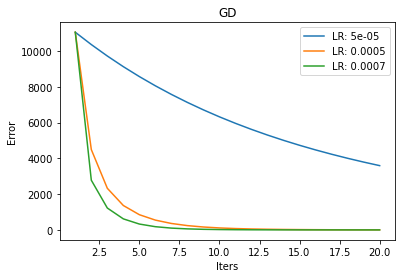

In [148]:
for lr in lr_list:
    df = computeGD(path + './datos.pickle', x_0, kmax, lr, A.shape[0])
    print('LR {}-------------'.format(lr))
    print('Error: ',df.iloc[-1, -3])
    print('F*: ',df.iloc[-1, -2])
    print('e_n: ', df.iloc[-1, -1])
    plt.plot(np.arange(1,21), df.loc[:19, 'Error'], label = 'LR: {}'.format(lr))

plt.title('GD')
plt.xlabel('Iters')
plt.ylabel('Error')
plt.legend()
plt.show()

In [151]:
df

,Iter,Xn,Pk,Error,F*,e_n
0,1,"[[0.6510327], [-0.6402778], [0.5964973], [-0.4...","[[930.0466936], [-914.6825149], [852.1390162],...",1.105689e+04,9894.169997,3.609492
1,2,"[[0.3748679], [-0.748828], [1.0003858], [-0.39...","[[-394.5211559], [-155.0717549], [576.9836224]...",2.780026e+03,2365.525201,1.794160
2,3,"[[0.2942286], [-0.7439306], [1.1967648], [-0.3...","[[-115.1989883], [6.9962969], [280.5413004], [...",1.223731e+03,801.290892,0.969708
3,4,"[[0.2485132], [-0.7408796], [1.2982121], [-0.3...","[[-65.3077043], [4.3584862], [144.9247506], [5...",6.175317e+02,393.925587,0.556117
4,5,"[[0.2299616], [-0.737101], [1.3503136], [-0.28...","[[-26.5023404], [5.3980718], [74.4307578], [31...",3.282363e+02,277.401487,0.345516
5,6,"[[0.221614], [-0.7344063], [1.3767358], [-0.26...","[[-11.9251416], [3.8496135], [37.7459485], [19...",1.801436e+02,241.982516,0.241229
6,7,"[[0.2182668], [-0.7323818], [1.3902125], [-0.2...","[[-4.7816337], [2.8920943], [19.252448], [11.9...",1.012746e+02,230.706106,0.193097
7,8,"[[0.2170641], [-0.7309279], [1.3970808], [-0.2...","[[-1.7182019], [2.0769661], [9.8118288], [7.32...",5.803867e+01,226.980485,0.172372
8,9,"[[0.216781], [-0.7299069], [1.4005936], [-0.25...","[[-0.4044064], [1.458607], [5.018348], [4.4801...",3.378214e+01,225.712055,0.163720
9,10,"[[0.2168469], [-0.7292088], [1.4023944], [-0.2...","[[0.094189], [0.9972407], [2.5725711], [2.7408...",1.991347e+01,225.269537,0.160066


##### Parte 3 - SGD

In [152]:
lr_list = [0.0005, 0.005, 0.01]
x_0 = np.zeros_like(x_true)
kmax = 1000

LR 0.0005-------------
Error:  0.7623288
F*:  225.1831423
e_n:  0.1561876
LR 0.005-------------
Error:  8.098707
F*:  283.2649058
e_n:  0.2858526
LR 0.01-------------
Error:  2.4908723
F*:  427.894943
e_n:  0.4747276


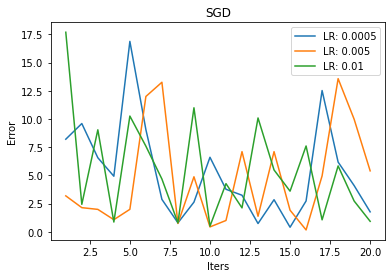

In [153]:
for lr in lr_list:
    df = computeGD(path + './datos.pickle', x_0, kmax, lr, 1)
    print('LR {}-------------'.format(lr))
    print('Error: ',df.iloc[-1, -3])
    print('F*: ',df.iloc[-1, -2])
    print('e_n: ', df.iloc[-1, -1])

    plt.plot(np.arange(1,21), df.loc[:19, 'Error'], label = 'LR: {}'.format(lr))

plt.title('SGD')
plt.xlabel('Iters')
plt.ylabel('Error')
plt.legend()
plt.show()

In [154]:
df

,Iter,Xn,Pk,Error,F*,e_n
0,1,"[[0.2522748], [-0.7424935], [1.3349916], [-0.1...","[[1.1913024], [-1.0809967], [1.3246568], [1.58...",17.692742,410.193189,0.473603
1,2,"[[0.2593048], [-0.8490338], [1.4144444], [-0.2...","[[-0.138106], [-0.0473764], [-0.0168659], [-0....",2.429286,452.749771,0.537811
2,3,"[[0.2430925], [-0.6837654], [1.3634969], [-0.2...","[[0.6558097], [-0.9275868], [0.6932371], [-0.1...",9.039074,423.142869,0.462815
3,4,"[[0.2127179], [-0.7324392], [1.4206069], [-0.2...","[[-0.020605], [-0.0668082], [-0.1211998], [0.0...",0.859460,466.099725,0.488642
4,5,"[[0.2561245], [-0.7156466], [1.4517949], [-0.2...","[[-2.0171949], [0.6653497], [-0.2170056], [-1....",10.258574,434.062344,0.450624
...,...,...,...,...,...,...
995,996,"[[0.2383325], [-0.6391685], [1.3737924], [-0.1...","[[-0.0357712], [-0.0127971], [0.0108665], [0.0...",0.343801,420.050440,0.473109
996,997,"[[0.2251467], [-0.6508922], [1.3503288], [-0.2...","[[-1.3593501], [-0.1331014], [0.1535549], [-0....",8.800802,507.525066,0.573466
997,998,"[[0.2584308], [-0.7324542], [1.3657262], [-0.3...","[[0.1057782], [-0.2152221], [0.0201342], [-0.4...",2.157811,426.519928,0.471962
998,999,"[[0.1501955], [-0.7113861], [1.4362772], [-0.2...","[[0.0467379], [-0.0028866], [-0.0045382], [0.0...",0.296432,468.960537,0.496206


##### Parte 4 - MiniBatch-GD

In [155]:
lr_list = [0.0005, 0.005, 0.01]
mb_list = [25, 50, 100]
x_0 = np.zeros_like(x_true)
kmax = 1000

LR 0.0005-------------
MB 25-------------
Error:  28.1598911
F*:  225.1917208
e_n:  0.1580921
Iters:  1000
MB 50-------------
Error:  29.3353591
F*:  225.1685129
e_n:  0.1591237
Iters:  1000
MB 100-------------
Error:  42.6783553
F*:  225.1674189
e_n:  0.155477
Iters:  1000


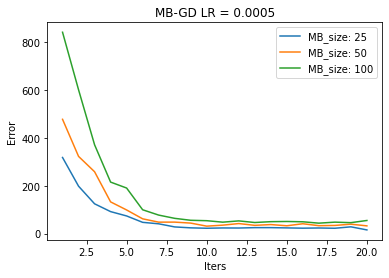

LR 0.005-------------
MB 25-------------
Error:  29.803456
F*:  307.9033878
e_n:  0.3236883
Iters:  1000
MB 50-------------
Error:  34.4599618
F*:  297.0192134
e_n:  0.2970079
Iters:  1000
MB 100-------------
Error:  89.0399498
F*:  363.6156148
e_n:  0.4075882
Iters:  1000


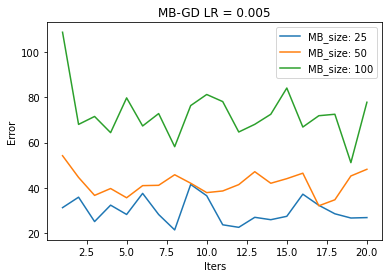

LR 0.01-------------
MB 25-------------
Error:  41.0048685
F*:  550.9378855
e_n:  0.5835332
Iters:  1000
MB 50-------------
Error:  95.378395
F*:  1031.9472264
e_n:  0.8702966
Iters:  1000
MB 100-------------
Error:  145282.090332
F*:  1235599481.4316168
e_n:  1098.35735
Iters:  1000


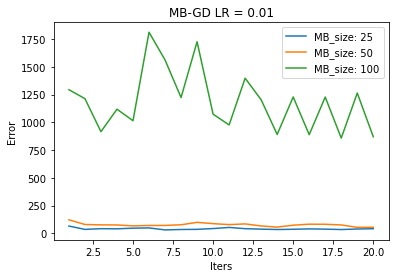

In [156]:
for lr in lr_list:
    print('LR {}-------------'.format(lr))
    for mb in mb_list:
        df = computeGD(path + './datos.pickle', x_0, kmax, lr, mb)
        print('MB {}-------------'.format(mb))
        print('Error: ',df.iloc[-1, -3])
        print('F*: ',df.iloc[-1, -2])
        print('e_n: ', df.iloc[-1, -1])
        print('Iters: ', df.iloc[-1, 0])

        plt.plot(np.arange(1,21), df.loc[:19, 'Error'], label = 'MB_size: {}'.format(mb))

    plt.title('MB-GD LR = {}'.format(lr))
    plt.xlabel('Iters')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

#### Metodo de Newton

##### Parte 1 - GD con Backtracking line search

In [58]:
def evalRosenbrockFunction(x0):
    x = x0[0, 0]
    y = x0[1, 0]
    rsb_function = '100*((y-x**2)**2) + (1 - x)**2'
    result = eval(rsb_function, {}, {'x': x, 'y': y})
    return result

In [59]:
def backTrackingLineSearch(x_0, lr, ro, c):
    x_k = x_0
    condition = True

    while condition:
        gradient = getRosenbrockGradient(x_k)
        x_k1 = x_k - (lr * gradient)

        fk_1 = evalRosenbrockFunction(x_k1)
        f_k = evalRosenbrockFunction(x_k)
        rhs = c * lr * np.matmul(gradient.T, -gradient)

        condition = (fk_1 > (f_k + rhs)) #the loop is the negated condition of the backtracking algorithm
        lr *= ro

    return lr

In [60]:
def rosenbrock_backtracking(x_0, kmax, epsilon, alpha, ro, c, lr_type = 'bracktracking'):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}

    if lr_type == 'backtracking':
        lr = backTrackingLineSearch(x_k, alpha, ro, c)
    else: #else it would be constant
        lr = alpha

    while k < kmax and error > epsilon:
        gradient = getRosenbrockGradient(x_k)
        x_k1 = x_k - (lr * gradient)

        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient, 2)

        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(-1 * gradient.round(7))
        data['Error'].append(error.round(7))

    results = pd.DataFrame(data)
    return results, lr

In [90]:
x_array = [np.array(['0', '0']), np.array(['0.6', '0.6']), np.array(['-0.5', '1']), np.array(['-1.2', '1'])]
x_0 = x_array[3]
epsilon = 0.00000001
kmax = 1000

alpha = 1 #0.0005
ro = 0.5
c = 0.0001

In [91]:
df, lr = rosenbrock_backtracking(x_0, kmax, epsilon, alpha, ro, c, 'backtracking')
print(lr)
df.tail()

0.00048828125


,Iter,Xn,Pk,Error
995,996,"[[-0.5348835], [0.2937681]]","[[1.4279042], [-1.5340892]]",2.095791
996,997,"[[-0.5341856], [0.2930193]]","[[1.4292308], [-1.5335454]]",2.096297
997,998,"[[-0.5334871], [0.2922708]]","[[1.4305596], [-1.5329986]]",2.096804
998,999,"[[-0.532788], [0.2915225]]","[[1.4318908], [-1.5324489]]",2.097310
999,1000,"[[-0.5320881], [0.2907745]]","[[1.4332242], [-1.5318962]]",2.097817


##### Parte 2 - Metodo de newton con Backtracking line search

In [63]:
def getRosenbrockHessian(x0):
    x = x0[0, 0]
    y = x0[1, 0]
    g1 = eval('1200*(x**2) - 400*(y) + 2', {}, {'x': x, 'y': y})
    g2 = eval('-400*(x)', {}, {'x': x})
    hessian = np.array([g1, g2, g2, 200], dtype = 'float').reshape(2,2)

    return hessian

In [64]:
def newton_optimization(x_0, kmax, epsilon, alpha, ro, c, lr_type = 'backtracking'):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}

    if lr_type == 'backtracking':
        lr = backTrackingLineSearch(x_k, alpha, ro, c)
    else: #else it would be constant
        lr = alpha

    while k < kmax and error > epsilon:
        gradient = getRosenbrockGradient(x_k)
        hessian = getRosenbrockHessian(x_k)
        p_k = -1 * np.matmul(np.linalg.inv(hessian), gradient)
        x_k1 = x_k + (lr * p_k)

        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient, 2)

        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(p_k.round(7))
        data['Error'].append(error.round(7))

    results = pd.DataFrame(data)
    return results, lr

In [65]:
x_array = [np.array(['0', '0']), np.array(['0.6', '0.6']), np.array(['-0.5', '1']), np.array(['-1.2', '1'])]
x_0 = x_array[0]
epsilon = 0.00000001
kmax = 3000

alpha = 1
ro = 0.5
c = 0.0001

In [66]:
df, lr = newton_optimization(x_0, kmax, epsilon, alpha, ro, c, 'backtracking')
print(lr)
df.tail()

0.0625


,Iter,Xn,Pk,Error
339,340,"[[1.0], [1.0]]","[[0.0], [0.0]]",0.0
340,341,"[[1.0], [1.0]]","[[0.0], [0.0]]",0.0
341,342,"[[1.0], [1.0]]","[[0.0], [0.0]]",0.0
342,343,"[[1.0], [1.0]]","[[0.0], [0.0]]",0.0
343,344,"[[1.0], [1.0]]","[[0.0], [0.0]]",0.0
